### 목표

모신러닝 과정
- 문제정의 

### 1. 문제정의
- 사망자/생존자 예측
- kaggle에 올려 점수를 확인해보자(높은 순위 차지해 보자)

### 2. 데이터 수집

- kaggle 사이트로 부터 다운, train,test,submission

In [1]:
#필요한 도구 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기
- train 데이터는 train
- test 데이터는 test  
 (단 , 각각의 인덱스는 PassengerId로 사용할 것!)

In [2]:
train=pd.read_csv("data/train.csv", index_col="PassengerId")
test=pd.read_csv("data/test.csv", index_col="PassengerId")

In [3]:
#크기확인
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       33

In [5]:
train.isnull().sum()
#결측치 컬럼
#age Cabin Embarked

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()
#결측치 컬럼
#age Fare Cabin

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### Age컬럼 결측치 처리
- 단순 기술 통계치로 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채움
- Age와 다른 컬럼의 상관관계를 확인해 보자

In [7]:
#상관관계를 확인하는 함수
train.corr()

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

- Age컬럼과 상관관계가 높은 컬럼은 ?다   
? = Pclass
- 생존에 관련이 많을 것 같은 성별(Sex)과 함께 그룹핑에 활용해 보자

In [8]:
#age, pclass, sex 열인덱싱
train[['Age', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex'])

In [9]:
pt1=train[['Age', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex']).mean()
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [10]:
#train 에서 Age 컬럼 결측ㅊ 있는행 출력
train[train['Age'].isnull()]

Survived  Pclass                                      Name  \
PassengerId                                                               
6                   0       3                          Moran, Mr. James   
18                  1       2              Williams, Mr. Charles Eugene   
20                  1       3                   Masselmani, Mrs. Fatima   
27                  0       3                   Emir, Mr. Farred Chehab   
29                  1       3             O'Dwyer, Miss. Ellen "Nellie"   
...               ...     ...                                       ...   
860                 0       3                          Razi, Mr. Raihed   
864                 0       3         Sage, Miss. Dorothy Edith "Dolly"   
869                 0       3               van Melkebeke, Mr. Philemon   
879                 0       3                        Laleff, Mr. Kristo   
889                 0       3  Johnston, Miss. Catherine Helen "Carrie"   

                Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
PassengerId                                                                 
6              male  NaN      0      0      330877   8.4583   NaN        Q  
18             male  NaN      0      0      244373  13.0000   NaN        S  
20           female  NaN      0      0        2649   7.2250   NaN        C  
27             male  NaN      0      0        2631   7.2250   NaN        C  
29           female  NaN      0      0      330959   7.8792   NaN        Q  
...             ...  ...    ...    ...         ...      ...   ...      ...  
860            male  NaN      0      0        2629   7.2292   NaN        C  
864          female  NaN      8      2    CA. 2343  69.5500   NaN        S  
869            male  NaN      0      0      345777   9.5000   NaN        S  
879            male  NaN      0      0      349217   7.8958   NaN        S  
889          female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 11 columns]

In [11]:
#Pclass 3, Sex male
#출력값은 26.507589
#pt1.loc[3].loc['male']
#위구문을 줄여서
pt1.loc[(3, 'male')]

Age    26.507589
Name: (3, male), dtype: float64

In [12]:
#34.611765
pt1.loc[(1, 'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [13]:
#apply 함수 적용하여 age컬럼의 결측치를 채워보자.

In [14]:
def fill_age(row):
    #만약에 나이에 결측치가 있으면 pt1에서 값을 가져오자
    if np.isnan(row['Age']):
        return pt1.loc[(row['Pclass'], row['Sex'])]
    
    #만약 결측치가 x 원래 나이값을 사용하자
    else:
        return row['Age']

In [15]:
train['Age']=train.apply(fill_age, axis=1).astype(np.int64)

In [16]:
train[train['Age'].isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [18]:
#test 마찬가지로 p1을 기준으로 결측치 처리
test[test['Age'].isnull()]

Pclass                                               Name  \
PassengerId                                                              
902               3                                   Ilieff, Mr. Ylio   
914               1               Flegenheim, Mrs. Alfred (Antoinette)   
921               3                                  Samaan, Mr. Elias   
925               3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
928               3                                Roth, Miss. Sarah A   
...             ...                                                ...   
1300              3                    Riordan, Miss. Johanna Hannah""   
1302              3                             Naughton, Miss. Hannah   
1305              3                                 Spector, Mr. Woolf   
1308              3                                Ware, Mr. Frederick   
1309              3                           Peter, Master. Michael J   

                Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
PassengerId                                                                 
902            male  NaN      0      0      349220   7.8958   NaN        S  
914          female  NaN      0      0    PC 17598  31.6833   NaN        S  
921            male  NaN      2      0        2662  21.6792   NaN        C  
925          female  NaN      1      2  W./C. 6607  23.4500   NaN        S  
928          female  NaN      0      0      342712   8.0500   NaN        S  
...             ...  ...    ...    ...         ...      ...   ...      ...  
1300         female  NaN      0      0      334915   7.7208   NaN        Q  
1302         female  NaN      0      0      365237   7.7500   NaN        Q  
1305           male  NaN      0      0   A.5. 3236   8.0500   NaN        S  
1308           male  NaN      0      0      359309   8.0500   NaN        S  
1309           male  NaN      1      1        2668  22.3583   NaN        C  

[86 rows x 10 columns]

In [19]:
#test['Age'] 결측치 처리하기
test['Age']=test.apply(fill_age, axis=1).astype(np.int64)
test[test['Age'].isnull()]

Empty DataFrame
Columns: [Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [20]:
#train 데이터를 기준으로 test의 age null 값도 채워짐
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### train - Embarked 결측치
- train Embaked 결측치 있는 행 출력
- isnull 함수 이용 -> 불리언인덱싱 이용하겠다.

In [21]:
train[train['Embarked'].isnull()]

Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex  Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                                          
62           female   38      0      0  113572  80.0   B28      NaN  
830          female   62      0      0  113572  80.0   B28      NaN

In [22]:
#value_counts()를 통해서 train['Embarked']의 유니크하고, 카운트 되는 값을 뽑아보자
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [24]:
#train['Embarked'] 컬럼에 널이 있으면 'S'로 채워주세요
train[train['Embarked'].isnull()]

Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex  Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                                          
62           female   38      0      0  113572  80.0   B28      NaN  
830          female   62      0      0  113572  80.0   B28      NaN

In [25]:
#결측치에서 빈값이 있으면 S를 넣어라
#fillna 함수는 빈값 검색과 대입을 동시사용해준다
train['Embarked']=train['Embarked'].fillna('S');
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### test-fare 결측치 처리

In [27]:
#상관 관계가 높은 것을 찾아서
train.corr()

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.066538 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.410104  0.083081  0.018443 -0.549500
Age      -0.066538 -0.410104  1.000000 -0.251439 -0.178855  0.120173
SibSp    -0.035322  0.083081 -0.251439  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.178855  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.120173  0.159651  0.216225  1.000000

In [28]:
#Fare 와 상관관계가 높은 컬럼은 Pclass 다.
#생존/사망에 영향을 미쳤을 것 같은 Sex 컬럼과도 함께 그룹화해서 
#fare의 평균값을 뽑아 보자.

#pclass, sex 그룹화
#.mean()
# pt2 저장

In [29]:
train[['Fare', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex'])

In [30]:
pt2=train[['Fare', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex']).mean()
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [31]:
#test 데이터의 fare 요금의 결측치가 있는 행 출력
test[test['Fare'].isnull()]

Pclass                Name   Sex  Age  SibSp  Parch Ticket  Fare  \
PassengerId                                                                     
1044              3  Storey, Mr. Thomas  male   60      0      0   3701   NaN   

            Cabin Embarked  
PassengerId                 
1044          NaN        S

In [32]:
#검색된 결측치 채우기
test['Fare']=test['Fare'].fillna(12.661633);

#값을 잘 못넣었을때 해당행에 넣어 줄 때
#test.loc[1044, 'Fare']=12.661633

In [33]:
#결측치 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 결측치 처리

In [34]:
#Cabin  컬럼 값을 중복값 없이 출력
train['Cabin'].unique()
# 결측치를 'M'으로 일단 채워보자.
train['Cabin']=train['Cabin'].fillna('M')
train['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [35]:
test['Cabin']=test['Cabin'].fillna('M')
test['Cabin'].unique()

array(['M', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [36]:
train['Deck']=train['Cabin'].str[0]
#train['Cabin'].str[0]
train['Deck'].head()

PassengerId
1    M
2    C
3    M
4    C
5    M
Name: Deck, dtype: object

In [37]:
test['Deck']=test['Cabin'].str[0]
#test['Cabin'].str[0]
test['Deck'].head()

PassengerId
892    M
893    M
894    M
895    M
896    M
Name: Deck, dtype: object

In [38]:
#Cabin 컬럼 drop
train.drop('Cabin', axis=1, inplace=True)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [40]:
test.drop('Cabin', axis=1, inplace=True)

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### 데이터 탐색
- train 데이터를 이용하여 탐색
- test 데이터를 탐색하는 것은 모델의 일반화 하는데 도움을 주지 못함

### Deck 시각화

In [42]:
train[['Deck', 'Survived', 'Name']].groupby(['Deck', 'Survived']).count()

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [43]:
#M 에서는 상대적으로 죽은 사람의 비율이 높음

### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

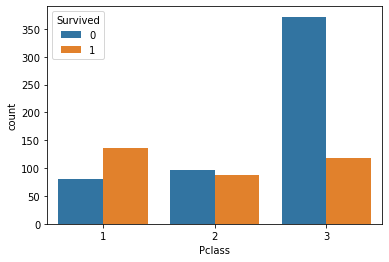

In [44]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [45]:
#Pclass == 1. 생존자의 비율이 높음
#Pclass == 2. 거의 비슷하지만, 사망자의 비율이 조금 높음
#Pclass == 3. 사망자의 비율이 월등히 높음
# Pclass의 값이 낮을수록( 계층이 낮을수록 ) 많이 죽음

### Deck 와 Pclass 시각화

<AxesSubplot:xlabel='Deck', ylabel='count'>

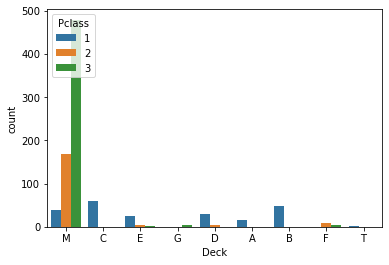

In [46]:
sns.countplot(data=train, x='Deck', hue='Pclass')

In [47]:
# M에서 사람이 상대적으로 많은 죽은이유
# Pclass 가 3등급 이여서

### Sex, Embarked 시각화
### 범주형 데이터

In [48]:
# x=Sex, hue=Embarked
# sns.countplot

<AxesSubplot:xlabel='Sex', ylabel='count'>

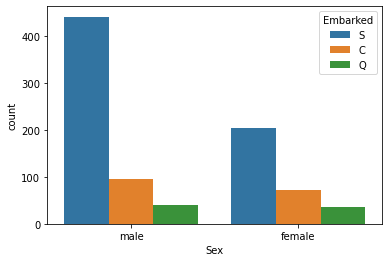

In [49]:
sns.countplot(data=train, x='Sex', hue='Embarked')

In [50]:
# x = Embarked, hue=Survived

<AxesSubplot:xlabel='Embarked', ylabel='count'>

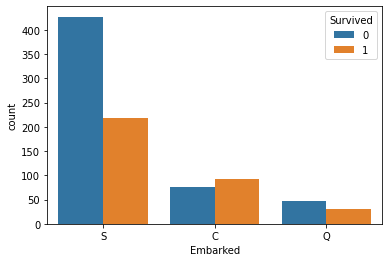

In [51]:
sns.countplot(data=train, x='Embarked', hue='Survived')

### 수치형 데이터
- sns.violinpolt : 박스플롯+밀집도 그래프


Age

<AxesSubplot:xlabel='Sex', ylabel='Age'>

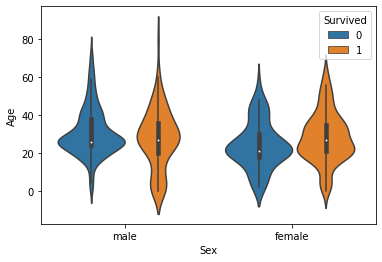

In [52]:
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived')

(0.0, 80.0)

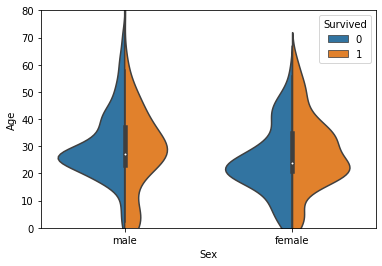

In [53]:
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived', split=True)
# 0 이하의 나이는 존재 하지 않으므로
plt.ylim(0,80)

- 20~40대 사이가 사망/생존 비율이 높음
- 어린아이 중 남자아이가 여아이에 비해 많이 생존

### Fare 시각화

In [54]:
#단순 기술 통계 뽑아보자
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

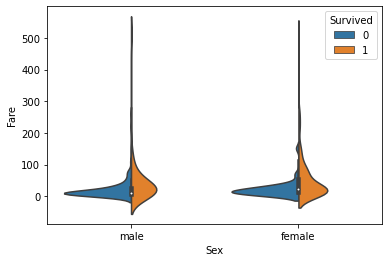

In [55]:
# x-Sex, y-Fare, hue=Survived
sns.violinplot(data=train, x='Sex', y='Fare', hue='Survived', split=True)

In [56]:
#요금이 싼 사람이 비교적 많이 사망

### 특성공학
Parch, Sibsp - 부모자식, 형제배우자 : 더해서 가족의 숫자라는 새로운 컬럼 생성

In [57]:
# +1 ( 자기자신도 더해줘야 하므로 1을 + 한다.)
train['Family_Size']=train['Parch']+train['SibSp'] +1
test['Family_Size']=test['Parch']+test['SibSp'] +1

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

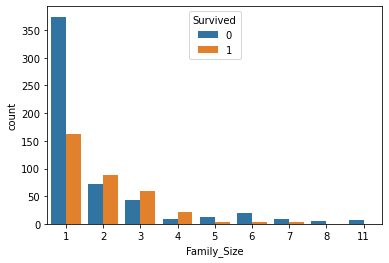

In [58]:
sns.countplot(data=train, x='Family_Size', hue='Survived')
#plt.legend(loc='upper right')

In [59]:
# 1명일때는 사망 비율 높음, 2~4명 일때는 생존 비율 높음, 5~11명은 사망 비율 높음
# 수치형 데이터 -> 범주형 데이터 : binning

#### cut함수 이용 : 카테고리화

In [60]:
# bins 구간설정
# labels 카테고리 이름 설정

In [61]:
b=[0,1,4,20]
lb=['Alone', 'Small', 'Large']
train['Family_Group']=pd.cut(train['Family_Size'], bins=b, labels=lb)

In [62]:
test['Family_Group']=pd.cut(test['Family_Size'], bins=b, labels=lb)

In [63]:
test['Family_Group'].head()

PassengerId
892    Alone
893    Small
894    Alone
895    Alone
896    Small
Name: Family_Group, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

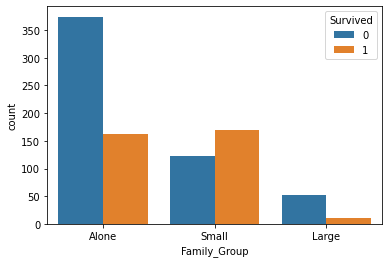

In [64]:
# x - Family_Group, hue - survived
sns.countplot(data=train, x='Family_Group', hue='Survived')

- 필요없는 컬럼 삭제

In [65]:
# Parch, Sibsp, Family_size 삭제
train.drop(['Parch', 'SibSp', 'Family_Size'], axis=1, inplace=True)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   Ticket        891 non-null    object  
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 110.6+ KB


In [67]:
test.drop(['Parch', 'SibSp', 'Family_Size'], axis=1, inplace=True)

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   Ticket        418 non-null    object  
 5   Fare          418 non-null    float64 
 6   Embarked      418 non-null    object  
 7   Deck          418 non-null    object  
 8   Family_Group  418 non-null    category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 29.9+ KB


In [69]:
# 전처리 안했던 컬럼도 삭제 Name, Ticket
train.drop(['Name', 'Ticket'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 96.7+ KB


In [70]:
test.drop(['Name', 'Ticket'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   Fare          418 non-null    float64 
 4   Embarked      418 non-null    object  
 5   Deck          418 non-null    object  
 6   Family_Group  418 non-null    category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 23.4+ KB


### 문제와 답 분리

In [71]:
#훈련데이터 문제
#X_train=train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_Group']]
#train.loc[:, 'Pclass':]
#train.iloc[:, 1:]
X_train=train.drop('Survived', axis=1)

#훈련데이터 답
y_train=train['Survived']

#테스트 데이터 문제
#train.loc[:, 'Pclass':]
#train.iloc[:, :]
#X_test=test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_Group']]
X_test=test


In [72]:
#각각의 크기
X_train.shape

(891, 7)

In [73]:
y_train.shape

(891,)

In [74]:
X_test.shape

(418, 7)

- 원핫 인코딩

In [75]:
cat_feature=['Sex', 'Embarked', 'Deck', 'Family_Group']

In [76]:
pd.get_dummies(X_train['Sex'], prefix='Sex')

Sex_female  Sex_male
PassengerId                      
1                     0         1
2                     1         0
3                     1         0
4                     1         0
5                     0         1
...                 ...       ...
887                   0         1
888                   1         0
889                   1         0
890                   0         1
891                   0         1

[891 rows x 2 columns]

In [77]:
for cat_name in cat_feature:
    one_hot=pd.get_dummies(X_train[cat_name], prefix=cat_name)
    # 원핫 인코딩 컬럼 병합
    X_train=pd.concat([X_train, one_hot], axis=1)
    #기존 컬럼 drop
    X_train.drop(cat_name, axis=1, inplace=True)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    uint8  
 4   Sex_male            891 non-null    uint8  
 5   Embarked_C          891 non-null    uint8  
 6   Embarked_Q          891 non-null    uint8  
 7   Embarked_S          891 non-null    uint8  
 8   Deck_A              891 non-null    uint8  
 9   Deck_B              891 non-null    uint8  
 10  Deck_C              891 non-null    uint8  
 11  Deck_D              891 non-null    uint8  
 12  Deck_E              891 non-null    uint8  
 13  Deck_F              891 non-null    uint8  
 14  Deck_G              891 non-null    uint8  
 15  Deck_M              891 non-null    uint8  
 16  Deck_T  

In [79]:
# X_test 원핫 인코딩
for cat_name in cat_feature:
    one_hot=pd.get_dummies(X_test[cat_name], prefix=cat_name)
    # 원핫 인코딩 컬럼 병합
    X_test=pd.concat([X_test, one_hot], axis=1)
    #기존 컬럼 drop
    X_test.drop(cat_name, axis=1, inplace=True)

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    uint8  
 4   Sex_male            418 non-null    uint8  
 5   Embarked_C          418 non-null    uint8  
 6   Embarked_Q          418 non-null    uint8  
 7   Embarked_S          418 non-null    uint8  
 8   Deck_A              418 non-null    uint8  
 9   Deck_B              418 non-null    uint8  
 10  Deck_C              418 non-null    uint8  
 11  Deck_D              418 non-null    uint8  
 12  Deck_E              418 non-null    uint8  
 13  Deck_F              418 non-null    uint8  
 14  Deck_G              418 non-null    uint8  
 15  Deck_M              418 non-null    uint8  
 16  Famil

In [81]:
# set 자료형 ===> 집합 - 정렬, 중복제거
ls=[1,1,3,2,0]
set(ls)

{0, 1, 2, 3}

In [82]:
set(X_train.columns)

{'Age',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_M',
 'Deck_T',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Family_Group_Alone',
 'Family_Group_Large',
 'Family_Group_Small',
 'Fare',
 'Pclass',
 'Sex_female',
 'Sex_male'}

In [83]:
set(X_test.columns)

{'Age',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_M',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Family_Group_Alone',
 'Family_Group_Large',
 'Family_Group_Small',
 'Fare',
 'Pclass',
 'Sex_female',
 'Sex_male'}

In [84]:
set(X_train.columns)-set(X_test.columns)

{'Deck_T'}

In [85]:
# 컬럼의 갯수를 맞추기 위해 Dect_T 컬럼을 만들어서 0으로 채워주자
X_test['Dect_T']=0

In [86]:
X_test.shape

(418, 20)

In [87]:
# 컬럼 정렬
# sort_index(axis=1)

In [88]:
X_train.sort_index(axis=1, inplace=True)
X_test.sort_index(axis=1, inplace=True)

### 모델 선정 및 학습

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
tree_model=DecisionTreeClassifier()

In [91]:
#학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
#예측
pre=tree_model.predict(X_test)
pre

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [93]:
#gender_submission, csv 불러오기nder_submission, csv 불러오기
result=pd.read_csv('data/gender_submission.csv', index_col='PassengerId')
result['Survived']=pre
result['Survived']

PassengerId
892     0
893     0
894     1
895     1
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [94]:
result.to_csv('data/chsw_submission_20210319_1.csv')

### 과대적합제어
- 하이퍼 파라미터 튜닝

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
# random_sta=77, test_size=30%
X_train2,X_val,y_train2,y_val=train_test_split(X_train,y_train,random_state=77)

In [99]:
# X_train2, X_val, y_train2, y_val shape 확인해주세요!
print(X_train2.shape)
print(X_val.shape)
print(y_train2.shape)
print(y_val.shape)

(668, 20)
(223, 20)
(668,)
(223,)


In [109]:
train_score_list=[]
test_score_list=[]
for max_d in range(1,50):
    model=DecisionTreeClassifier(max_depth=max_d)
    model.fit(X_train2, y_train2) #학습
    
    #트레인 정확도 누적
    #정확도 구하기
    #list 에 append
    train_score_list.append(model.score(X_train2, y_train2))
    
    #테스트 정확도 누적
    test_score_list.append(model.score(X_val, y_val))

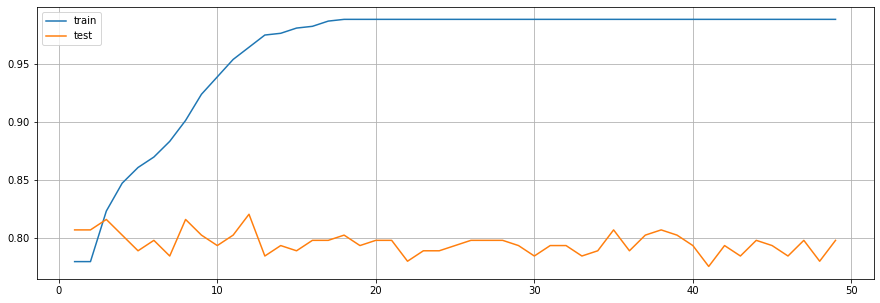

In [111]:
# 그래프
plt.figure(figsize=(15, 5))
plt.plot(range(1,50), train_score_list, label='train')
plt.plot(range(1,50), test_score_list, label='test')
plt.legend()
plt.grid()
plt.show()

In [103]:
# 과대 적합 제어 - tree 깊이 지정

In [136]:
# 트리 깊이 = 3 모델 생성
tree_model=DecisionTreeClassifier(max_depth=3)

In [137]:
#학습 X_train, y_train
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [138]:
# 예측 X_test
pre=tree_model.predict(X_test)
pre.shape

(418,)

In [141]:
# 정답지 초기화
submission=pd.read_csv('data/gender_submission.csv')
submission['Survived']=pre
submission

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [142]:
# kaggle에 올려 정확도 확인해 보자!
submission.to_csv('data/chsw_submission_20210322_1.csv', index=False)

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
tree_model=DecisionTreeClassifier(max_depth=3)

In [160]:
#교차검증
tree_cross_result=cross_val_score(tree_model, X_train, y_train, cv=5)
print(tree_cross_result)
print(tree_cross_result.mean())

[0.81005587 0.80898876 0.80337079 0.78089888 0.80337079]
0.8013370158809867


In [161]:
tree_model=DecisionTreeClassifier(max_depth=5)
tree_cross_result=cross_val_score(tree_model, X_train, y_train, cv=5)
print(tree_cross_result)
print(tree_cross_result.mean())
#교차 검증 정확도의 차이 폭이 넓어 신뢰하기 어렵다.

[0.81005587 0.78651685 0.8258427  0.78651685 0.86516854]
0.8148201619484026


In [162]:
#max_depth=3 일때의 정확도 평균이 제일 낮지만,
#각각의 교차 검증후의 정확도들의 차이의 폭이 제일 적기때문에
#max_depth=3이라고 설정한 모델이 제일 신뢰성이 있다라고 판단
#msx_depth=3을 가진 모델은 모든 샘플 데이터에 대해서 안정성을 가지고 있다.

### 랜던포레스트 : 앙상블

In [163]:
from sklearn.ensemble import RandomForestClassifier #분류모델

In [168]:
forest_model=RandomForestClassifier(random_state=0)

In [169]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [170]:
forest_pre=forest_model.predict(X_test)

In [171]:
result=pd.read_csv('data/gender_submission.csv')

In [172]:
result['Survived']=forest_pre

In [173]:
#csv 파일로 저장
result.to_csv('data/chsw_submission_20210322_2.csv', index=False)

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
#파라미터 정의
param_grid={
    'max_depth':[5,10,15],
    'n_estimators':[1000, 1500],
    'max_features':[0.5, 0.6, 0.7],
    'max_leaf_nodes':[20, 30, 50]
}

In [176]:
grid=GridSearchCV(forest_model, param_grid, cv=3)

In [178]:
#grid 어떤 파라미터가 좋은가? 최적인가? 학습하게 만듬
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [0.5, 0.6, 0.7],
                         'max_leaf_nodes': [20, 30, 50],
                         'n_estimators': [1000, 1500]})

In [179]:
print(grid.best_score_)
grid.best_params_

0.830527497194164


{'max_depth': 10,
 'max_features': 0.7,
 'max_leaf_nodes': 30,
 'n_estimators': 1500}

### - 베스트 파라미터 사용하여 모델 생성

In [181]:
forest_model=RandomForestClassifier(max_depth=10, 
                                    max_features=0.7, 
                                    max_leaf_nodes=30, 
                                    n_estimators=1500, 
                                    random_state=0)

In [185]:
#학습
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.7, max_leaf_nodes=30,
                       n_estimators=1500, random_state=0)

In [186]:
#교차검증 정확도 확인
tree_cross_result=cross_val_score(forest_model, X_train, y_train, cv=5)
print(tree_cross_result)
print(tree_cross_result.mean())

[0.82122905 0.82022472 0.85955056 0.80898876 0.85393258]
0.8327851358985626


In [188]:
#예측
final_result=forest_model.predict(X_test)

In [189]:
#csv 저장후 kaggle업로드 하여 정확도 확인
result['Survived']=final_result
result.to_csv('data/chsw_submission_20210322_3.csv', index=False)

In [ ]:
#1. 성능개선을 위해 매개변수 고쳐주기
#2. 데이터를 좀 더 살표보고 고칠 수 있는 부분, 새로운 특성,